In [1]:
#Excelデータを解析で扱えるようにする
#データ読み込みのためのpandasライブラリをロードする
import pandas as pd
#Excelファイルをwineという名前で読み込む
wine = pd.read_excel('wine.xlsx')
#wineの中身を表示する
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,4
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,6
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,7
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,8
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,9
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,10


In [2]:
#必要な関数の読み込み
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

#標準化の実施
scaler = StandardScaler()
wine_s=scaler.fit_transform(wine)
wine_s

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.96024611,
        -0.78782264, -1.73096794],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.58477711,
        -0.78782264, -1.72880152],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.58477711,
        -0.78782264, -1.7266351 ],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54162988,
         0.45084835,  1.7266351 ],
       [-1.39015528,  0.65462046, -0.77526673, ..., -0.20930812,
        -0.78782264,  1.72880152],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.54162988,
         0.45084835,  1.73096794]])

In [3]:
#主成分分析の適用
pca = PCA()
pca.fit(wine_s)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

寄与率
[0.24819822 0.17699736 0.13083605 0.09352342 0.07486933 0.07027533
 0.04852654 0.04517243 0.03865933 0.03161627 0.02329065 0.01348636
 0.0045487 ]
累積寄与率
[0.24819822 0.42519559 0.55603164 0.64955506 0.72442439 0.79469972
 0.84322627 0.88839869 0.92705802 0.95867429 0.98196495 0.9954513
 1.        ]


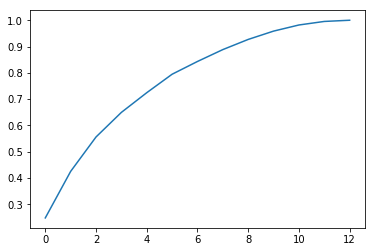

In [4]:
#プロットのライブラリをロードする
import matplotlib.pyplot as plt
%matplotlib inline
#寄与率と累積寄与率の計算
#各主成分の寄与率
ev_ratio = pca.explained_variance_ratio_
print("寄与率")
print(ev_ratio)
#累積寄与率の計算
cumsum_ratio = ev_ratio.cumsum()
print("累積寄与率")
print(cumsum_ratio)

#累積寄与率の表示
plt.plot(cumsum_ratio)
plt.show()


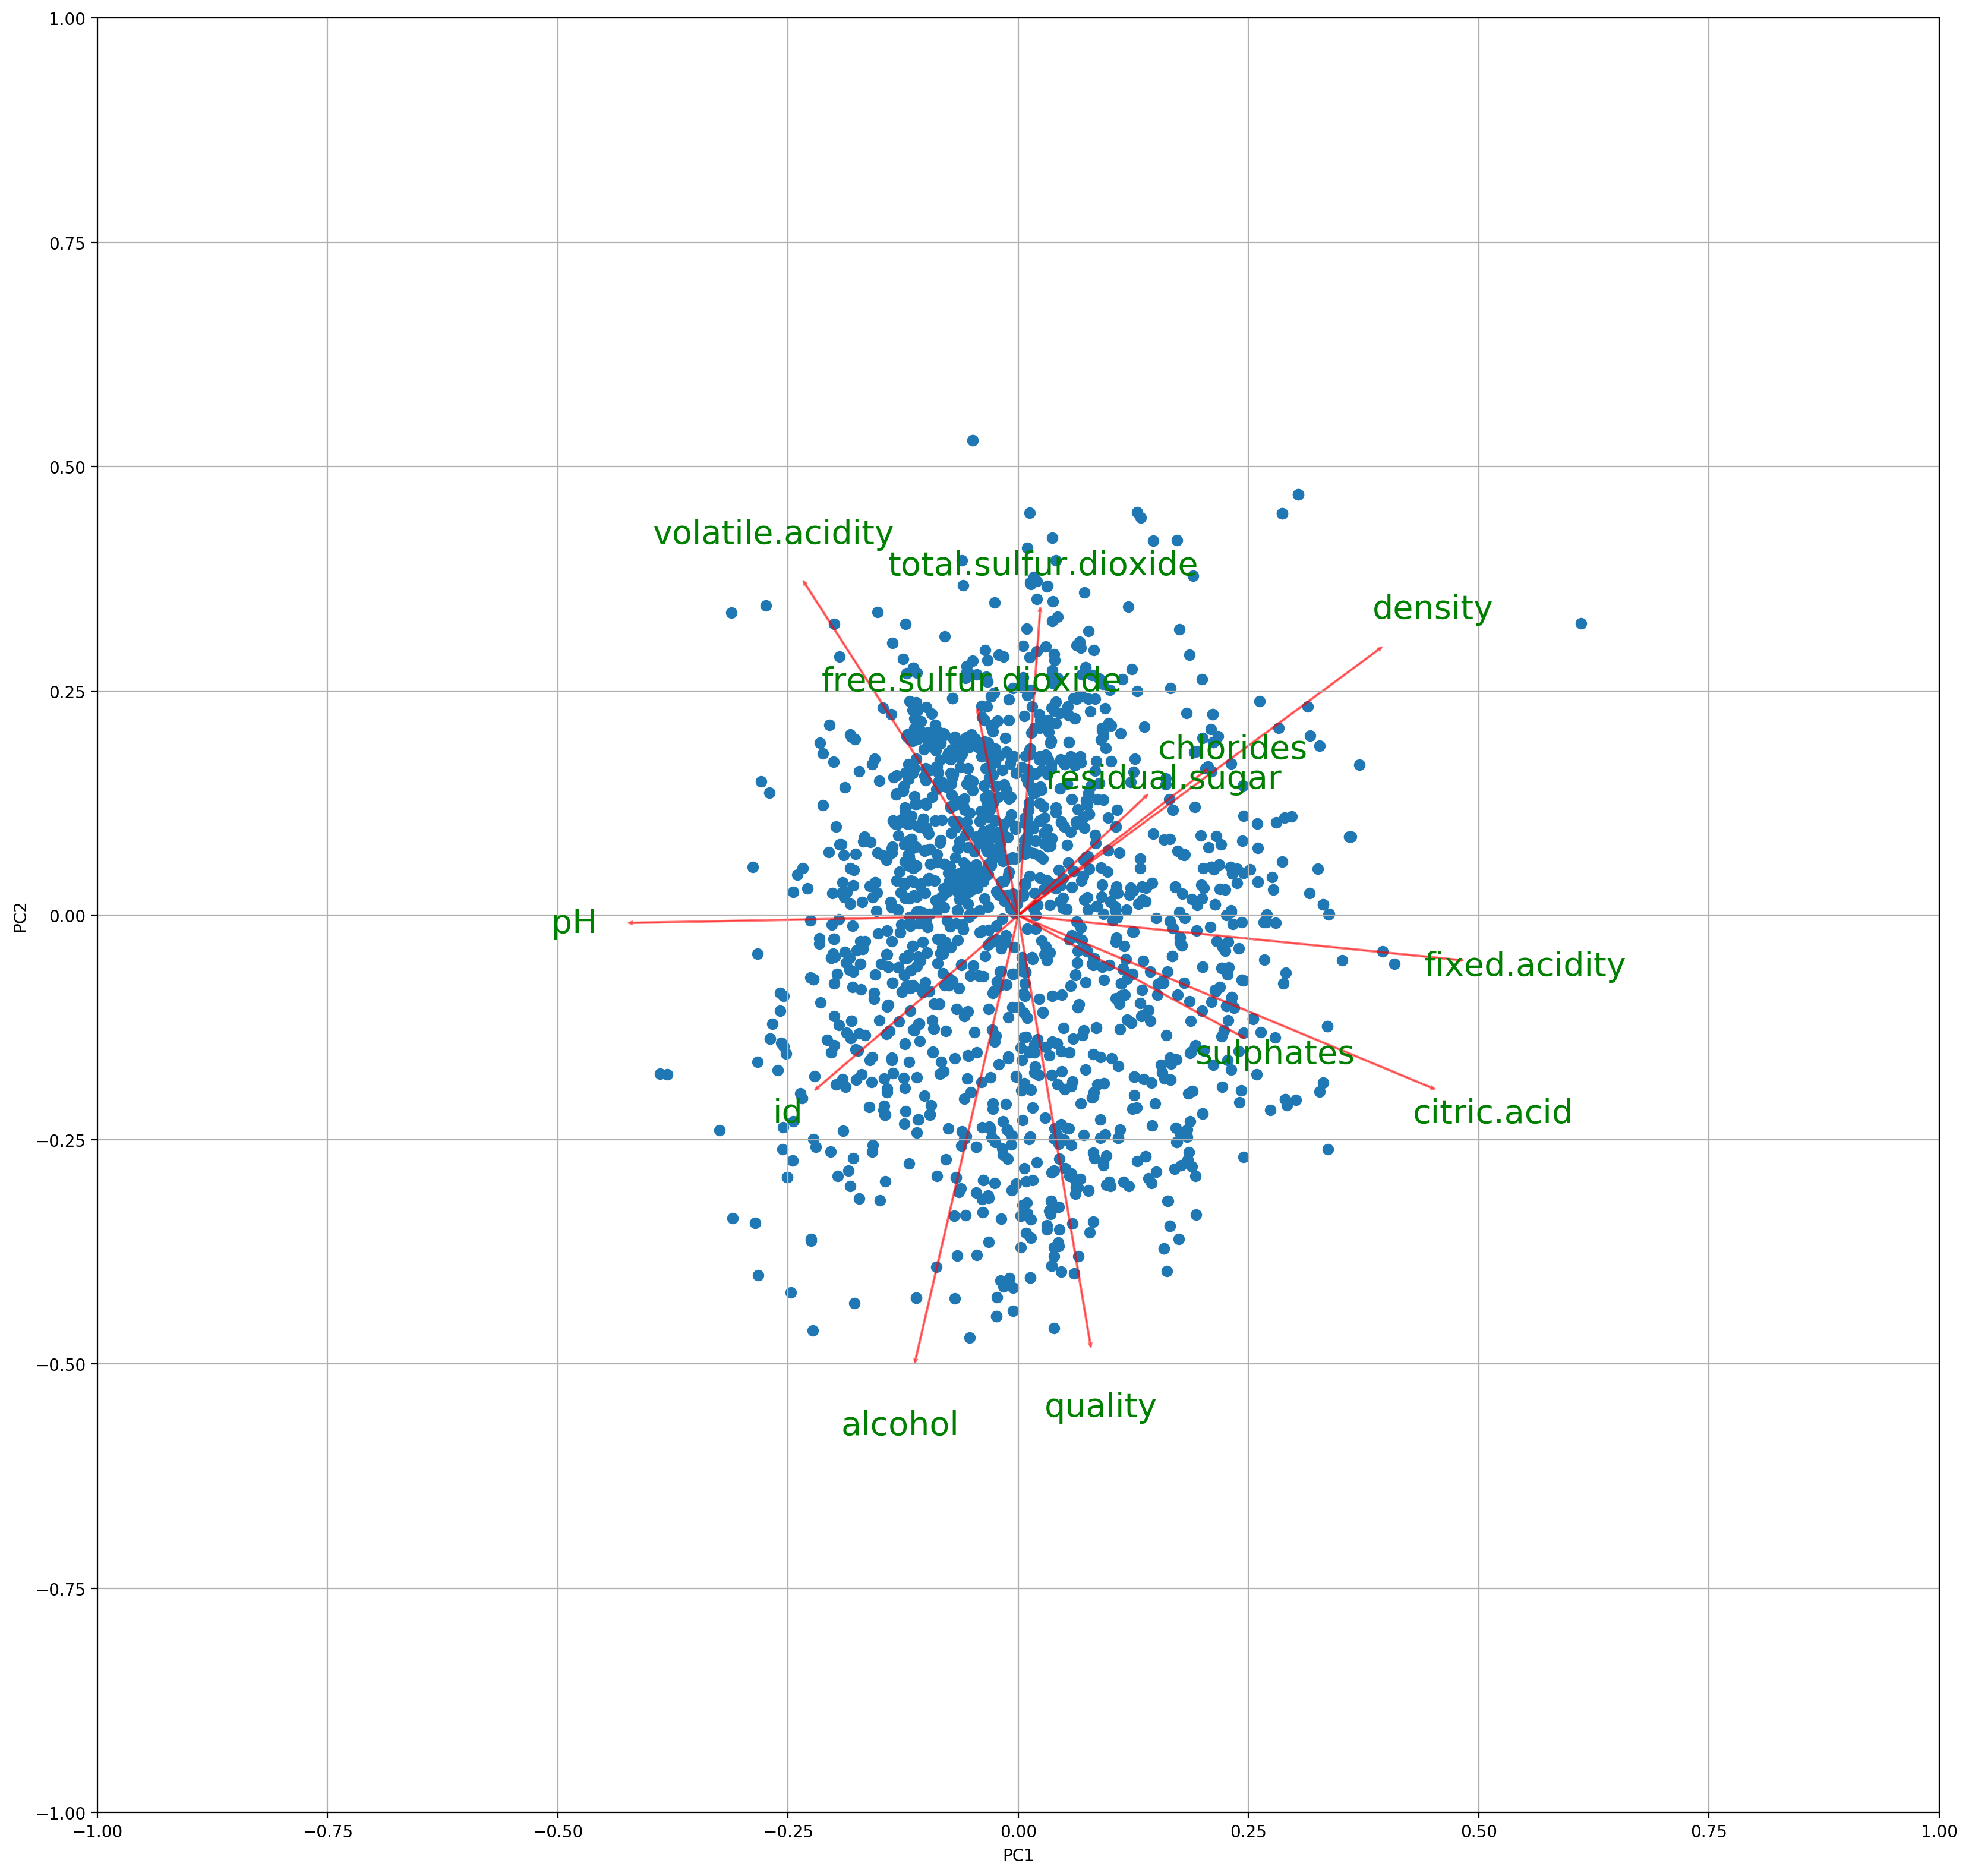

In [5]:

#biplot関数（オリジナル（https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/）を改造）
def biplot(score,coeff,pcax,pcay,labels1=None,labels2=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    if labels1 is None:
        plt.scatter(xs*scalex,ys*scaley)
    else:
        for i in range(len(xs)):
            plt.text(xs[i]*scalex,ys[i]*scaley, labels1[i])
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels2 is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=20)
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels2[i], color='g', ha='center', va='center', fontsize=20)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

#biplotによる各主成分上のそれぞれのデータと元の軸の対応
#作図サイズの設定
plt.figure(figsize=(20,20),dpi=200)

#主成分得点（元の各軸のデータを各主成分に変換したあとの座標）
x_new = pca.fit_transform(wine_s)
#因子負荷量（元の各軸を各主成分に変換したあとの座標）
c_new = np.transpose(pca.components_)

#第1, 2主成分でbiplotを表示
biplot(x_new, c_new, 1, 2, labels1 =  None, labels2 = wine.columns)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


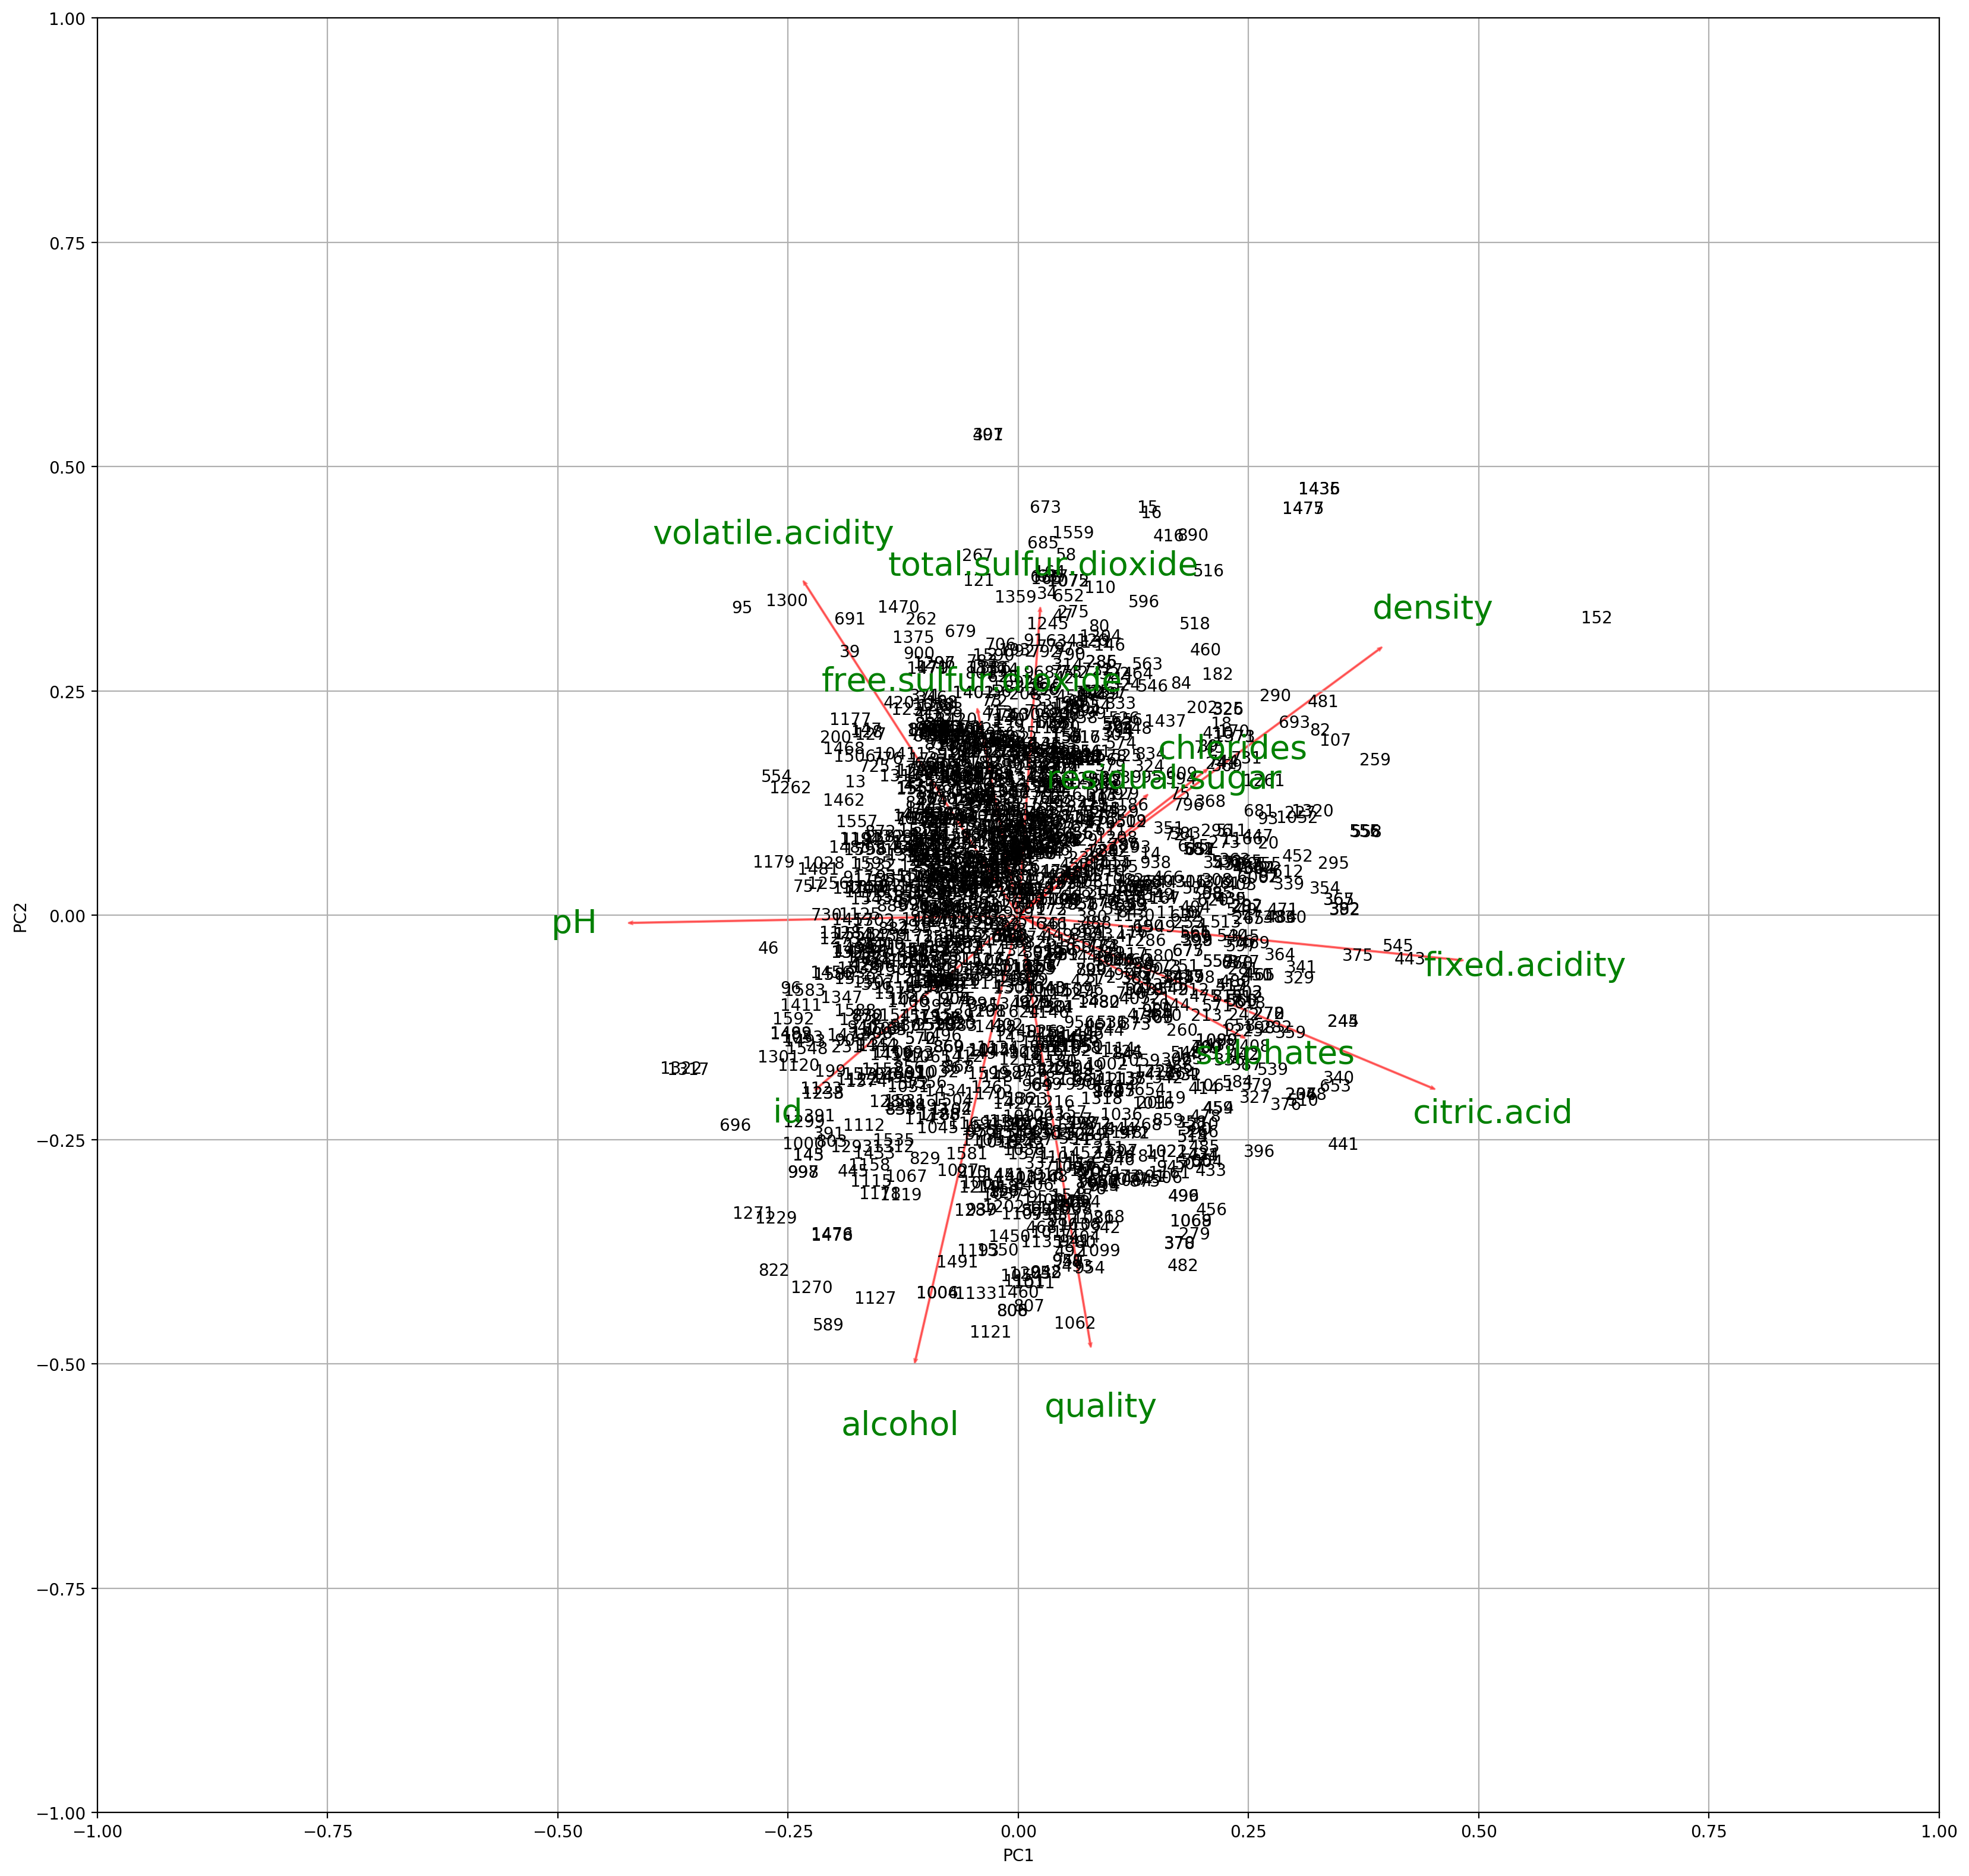

In [6]:
plt.figure(figsize=(20,20),dpi=200)
#biplotに商品IDを表示する
biplot(x_new, c_new, 1, 2, labels1 =  wine["id"].as_matrix() ,labels2 = wine.columns)
plt.show()